In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

data=pd.read_csv("C:/Users/민지/Downloads/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0, 0.5, 'Count')

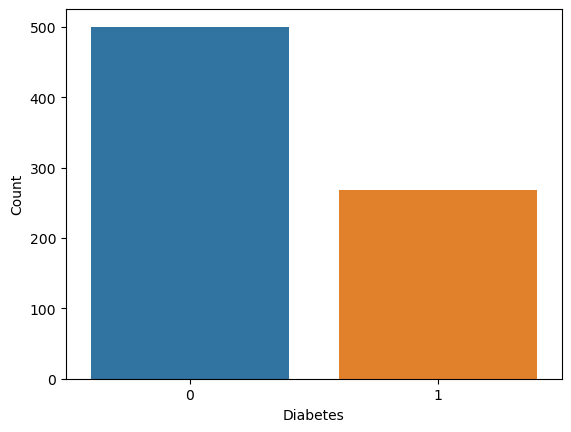

In [5]:
sns.countplot(data = data, x="Outcome")
plt.xlabel("Diabetes")
plt.ylabel("Count")

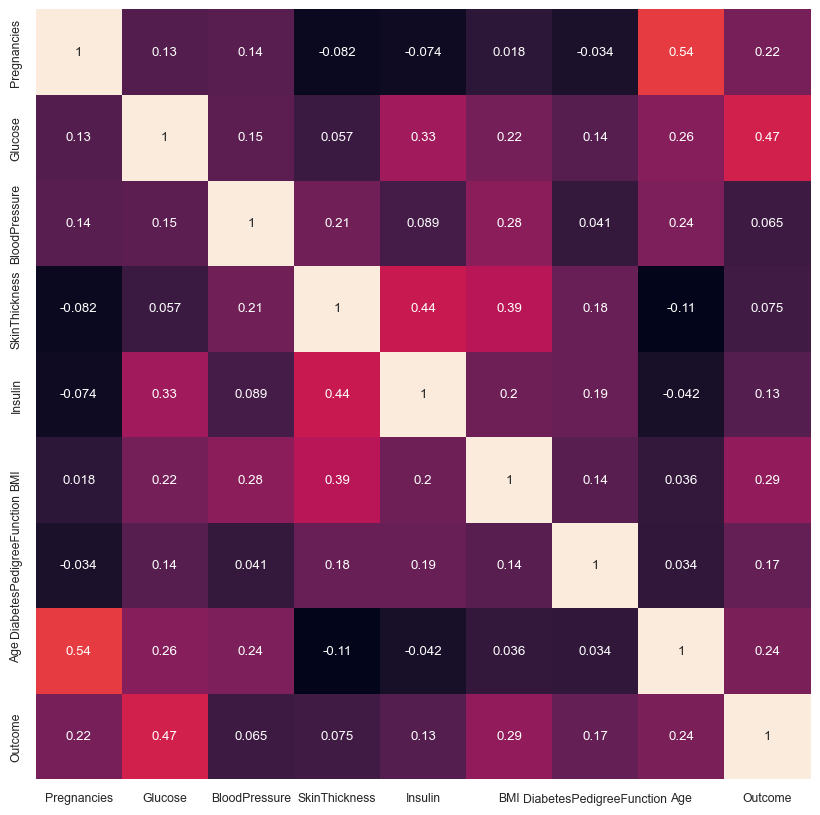

In [6]:
df_corr = data.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X=data.drop('Outcome', axis=1)
y=data['Outcome']

X.head()
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [10]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
ss.fit(X_train)
train_s= ss.transform(X_train)
test_s= ss.transform(X_test)

In [11]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)
matrix_dt=confusion_matrix(y_test, pred_dt)

print ("--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))

--- Decision Tree Classifier ---
0.7662337662337663
[[87 20]
 [16 31]]


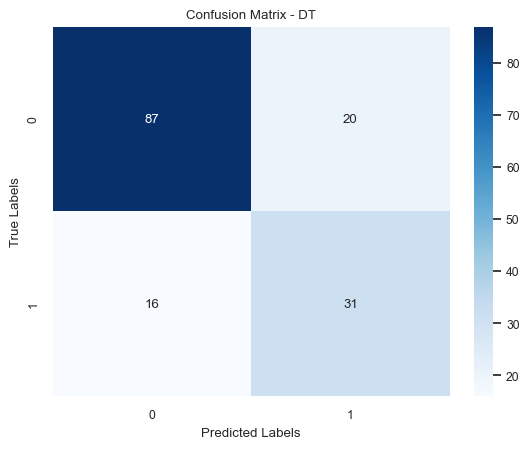

In [12]:
sns.heatmap(matrix_dt, annot=True, cmap='Blues')
plt.title('Confusion Matrix - DT')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [13]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)
matrix_rf=confusion_matrix(y_test, pred)

print ("--- Random Forest ---")
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))

--- Random Forest ---
0.7857142857142857
[[92 15]
 [18 29]]


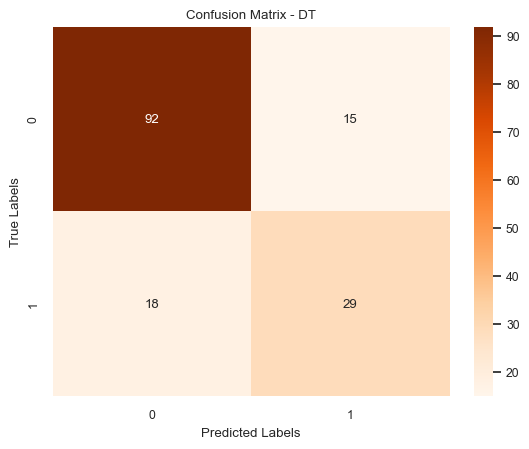

In [15]:
sns.heatmap(matrix_rf, annot=True, cmap='Oranges')
plt.title('Confusion Matrix - DT')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [16]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)
matrix_lr=confusion_matrix(y_test, pred_lr)

print ("--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

--- Logistic Regression Classifier ---
0.8246753246753247
[[98  9]
 [18 29]]


C:\anaconda_new\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


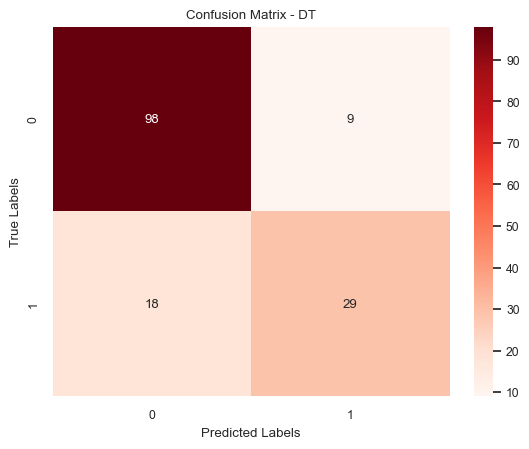

In [17]:
sns.heatmap(matrix_lr, annot=True, cmap='Reds')
plt.title('Confusion Matrix - DT')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [18]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)
matrix_svm=confusion_matrix(y_test, pred_svm)

print("--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

--- SVM Classifier ---
0.7922077922077922
[[98  9]
 [23 24]]


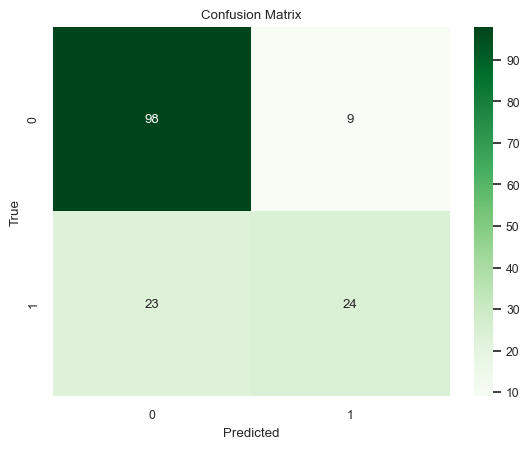

In [19]:
sns.heatmap(matrix_svm, annot=True, cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [20]:
#outcome 제거
data.drop(columns='Outcome', inplace=True)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [23]:
#BMI로부터 GLUCOSE 예측

X=data['BMI'].values.reshape(-1,1)
y=data['Glucose'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)
matrix_dt=confusion_matrix(y_test, pred_dt)

print ("--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))

mse = np.sqrt(mean_squared_error(pred_dt, y_test))
print('평균제곱근오차', mse)

--- Decision Tree Classifier ---
0.006493506493506494
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
평균제곱근오차 46.03457198868931


In [30]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)
matrix_rf=confusion_matrix(y_test, pred)

print ("--- Random Forest ---")
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))

mse = np.sqrt(mean_squared_error(pred, y_test))
print('평균제곱근오차', mse)

C:\Users\민지\AppData\Local\Temp\ipykernel_23100\3348606423.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


--- Random Forest ---
0.01948051948051948
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
평균제곱근오차 45.10895899727882


In [31]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)
matrix_lr=confusion_matrix(y_test, pred_lr)

print ("--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

mse = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차', mse)

C:\anaconda_new\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--- Logistic Regression Classifier ---
0.006493506493506494
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
평균제곱근오차 37.255872020394314


C:\anaconda_new\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)
matrix_svm=confusion_matrix(y_test, pred_svm)

print("--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

mse = np.sqrt(mean_squared_error(pred_svm, y_test))
print('평균제곱근오차', mse)

--- SVM Classifier ---
0.01948051948051948
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
평균제곱근오차 38.947100320519674


C:\anaconda_new\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
